In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("C:\\Users\\mendo\\Springboard\\Take Home Challenges\\ultimate_challenge\\logins.json") as json_file:
    json_data = json.load(json_file)
logins = pd.DataFrame(json_data)

## Part    1    ‑    Exploratory    data    analysis

The    attached       logins.json       file     contains     (simulated)     timestamps    of    user     logins     in    a    particular  geographic     location.     Aggregate     these     login     counts    based    on    15­ minute     time     intervals,    and  visualize     and    describe     the     resulting     time     series    of     login     counts     in    ways     that    best     characterize     the  underlying    patterns     of     the    demand.     Please     report/illustrate     important     features    of     the    demand,  such     as    daily     cycles.     If     there     are     data     quality     issues,    please     report     them.

In [3]:
# initial data cleansing

logins['hour'] = logins['login_time'].str[-8:-6]
logins['minute'] = logins['login_time'].str[-5:-3]

logins['login_time'] = pd.to_datetime(logins['login_time'])
logins['month'] = logins['login_time'].apply(lambda x: x.month)
logins['weekday'] = logins['login_time'].dt.dayofweek
logins['count'] = 1

In [4]:
# split into quarter-hours

tq1 = []
tq2 = []
tq3 = []
tq4 = []

for row in logins['minute'].astype(int):
    if row < 15:
        tq1.append(1)
        tq2.append(0)
        tq3.append(0)
        tq4.append(0)
    elif row < 30:
        tq1.append(0)
        tq2.append(1)
        tq3.append(0)
        tq4.append(0)
    elif row < 45:
        tq1.append(0)
        tq2.append(0)
        tq3.append(1)
        tq4.append(0)
    else:
        tq1.append(0)
        tq2.append(0)
        tq3.append(0)
        tq4.append(1)

logins['0-15'] = tq1
logins['15-30'] = tq2
logins['30-45'] = tq3
logins['45-60'] = tq4

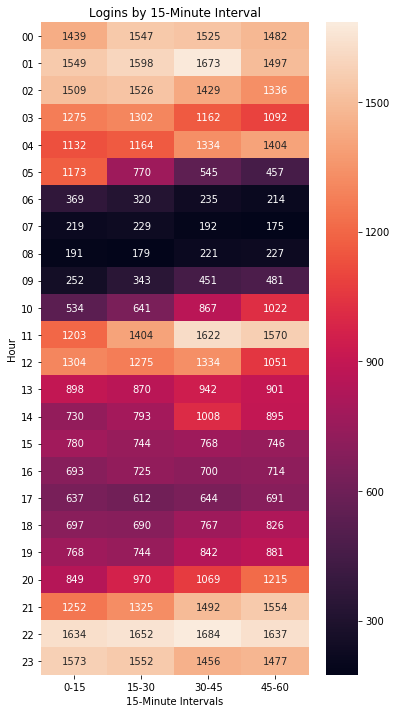

In [5]:
logins_agg_hour = logins[['hour', '0-15', '15-30', '30-45', '45-60']].groupby('hour').sum()

f, ax = plt.subplots(figsize=(6, 12))
sns.heatmap(logins_agg_hour, annot=True,fmt = '.0f')
plt.ylabel('Hour')
plt.xlabel('15-Minute Intervals')
plt.yticks(rotation=0)
plt.title('Logins by 15-Minute Interval')
plt.show()

C:\Users\mendo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\mendo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


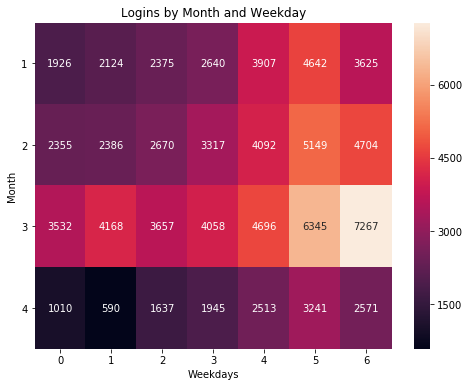

In [6]:
logins_agg_month = logins[['month', 'weekday', 'count']]
logins_agg_month['month'] = logins_agg_month['month'].astype(str)
for elem in logins_agg_month['weekday'].unique():
    logins_agg_month[str(elem)] = logins_agg_month['weekday'] == elem

logins_agg_month = logins_agg_month[['month', '0', '1', '2', '3', '4', '5', '6']]
logins_agg_month = logins_agg_month.groupby('month').sum()

f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(logins_agg_month, annot=True,fmt = '.0f')
plt.ylabel('Month')
plt.xlabel('Weekdays')
plt.yticks(rotation=0)
plt.title('Logins by Month and Weekday')
plt.show()

## Part    2    ‑    Experiment    and    metrics    design

The    neighboring     cities    of    Gotham    and    Metropolis    have     complementary     circadian     rhythms:     on  weekdays,    Ultimate    Gotham     is    most     active    at    night,    and    Ultimate    Metropolis     is    most    active  during     the    day.    On    weekends,     there     is     reasonable    activity     in    both     cities.    However,    a     toll    bridge,     with     a     two  ­way     toll,    between     the     two     cities     causes    driver    partners     to     tend  to    be    exclusive     to    each     city.     The     Ultimate    managers    of     city    operations     for     the     two     cities    have  proposed    an    experiment     to     encourage    driver    partners     to    be    available     in    both     cities,    by  reimbursing    all     toll     costs.  

1. What    would     you     choose     as     the     key    measure    of     success    of     this    experiment     in  encouraging    driver     partners     to     serve    both     cities,    and    why    would     you     choose     this    metric?  

2. Describe    a    practical     experiment     you    would    design     to     compare     the    effectiveness    of     the  proposed     change     in     relation     to     the     key    measure    of     success.    Please    provide    details     on:   
a. how     you    will     implement     the    experiment  
b. what     statistical     test(s)     you    will     conduct     to     verify     the     significance    of     the  observation  
c. how     you    would     interpret     the     results    and    provide     recommendations     to     the     city  operations     team    along    with    any     caveats

1. I'd measure the amount of time split between each city. For example, if Joe Driver spent 80% of his time in one city before the experiment and spent 60% of his time after, this would suggest that the reimbursement successfully incentivised him to split his time more equitably. You can view this hour by hour to verify his movement to the are with more demand. It would also be useful to use the raw measurment for total time.


2. A. I'd identify drivers who, for example, drive in Metropolis during both the peaks and valleys of its demand. This cohort would have the most incentive to use the reimbursement to maximize their profit because they're already willing to commit their time. Then, I'd identify drivers who only drive during the peak hours in a city. From each of these two cohorts, I'd create control and experimental groups to see if the reimbursement can: successfully convince drivers to move locations and incentivize drivers to drive for longer periods of time.


2. B. A t-test would measure if there is a statistically significant difference between the control and experimental group in each cohort. I'd plot a cumulative distribution function to visually describe it. The tests would measure percent of time in a city and total time driving.


2. C. If the experiment doesn't have an effect, the recommendation is easy enough: don't do it. Let's say, however, that both measurements show a statistically significant change. The recommendation would communicate that the reimbursement is effective in increasing drive times and location distribution. However, there still needs to be a cost analysis: is the cost of the toll (and the overhead to process requests) higher or lower than the amount of profit the company receives? Of course, there is the question of the increased supply increasing demand--if a driving company is reliably supplying the market, do customers feel more comfortable in building their plans around this company? Perhaps it is not cost effective to provide the reimbursement today, but if it drives customer growth, it will likely be worth it in the future. The company's risk apetite would inform a short or long play.

## Part    3    ‑    Predictive     modeling    

Ultimate     is     interested     in     predicting     rider     retention.    To    help    explore     this    question,    we    have  provided     a     sample    dataset     of     a     cohort    of    users    who     signed    up     for    an    Ultimate    account     in 
January    2014.    The     data    was    pulled     several    months     later;    we     consider    a    user     retained     if     they  were     “active”     (i.e.     took    a     trip)     in     the     preceding    30    days.    We     would     like     you     to    use     this    data     set     to    help    understand    what     factors    are     the    best    predictors  for     retention,    and    offer     suggestions     to     operationalize     those     insights     to    help    Ultimate.    The    data     is     in     the    attached     file     ultimate_data_challenge.json.    See    below     for    a    detailed  description     of     the    dataset.     Please     include    any     code     you    wrote     for     the    analysis    and    delete     the  dataset    when     you    have     finished     with     the     challenge.    

1. Perform    any     cleaning,     exploratory    analysis,    and/or     visualizations     to    use     the    provided  data     for     this    analysis     (a     few     sentences/plots    describing     your    approach    will     suffice).    What  fraction     of     the    observed     users    were     retained?  
2. Build    a    predictive     model     to     help    Ultimate    determine    whether    or    not    a    user    will    be    active  in     their    6th    month     on     the     system.    Discuss    why     you     chose     your    approach,    what  alternatives     you     considered,     and    any     concerns     you    have.    How     valid     is     your    model?  Include    any     key     indicators    of     model    performance.  
3. Briefly    discuss    how     Ultimate     might     leverage     the     insights    gained     from     the    model     to  improve     its     long­  term     rider     retention     (again,    a     few     sentences    will     suffice).

In [7]:
with open("C:\\Users\\mendo\\Springboard\\Take Home Challenges\\ultimate_challenge\\ultimate_data_challenge.json") as json_file:
    json_data = json.load(json_file)
ultimate = pd.DataFrame(json_data)

In [8]:
# idenify retention

r = []
for row in ultimate['trips_in_first_30_days']:
    if row == 0:
        r.append(0)
    else:
        r.append(1)
ultimate['retained'] = r

r6 = []
for row in ultimate['last_trip_date']:
    if (row[-4] == '6') or (row[-4] == '7'):
        r6.append(1)
    else:
        r6.append(0)
ultimate['retained_6'] = r6

ultimate['count'] = 1

In [9]:
print('Percent retention Month 1: ', ultimate['retained'].mean()*100)
print('Percent retention Month 6: ', ultimate['retained_6'].mean()*100)

Percent retention Month 1:  69.22
Percent retention Month 6:  37.608000000000004


First month retention comes in around 70% and the sixth month retention comes in around 38%. Now, I'll break down each retention level by a few categorical variables: city, device, and ultimate black user.

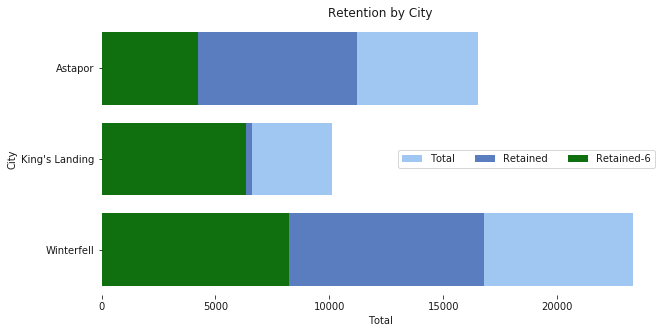

In [10]:
ultimate_city = ultimate[['count', 'retained', 'retained_6', 'city']].groupby('city').sum().reset_index()

f, ax = plt.subplots(figsize=(10, 5))

sns.set_color_codes("pastel")
sns.barplot(x="count", y="city", data=ultimate_city,
            label="Total", color="b")

sns.set_color_codes("muted")
sns.barplot(x="retained", y="city", data=ultimate_city,
            label="Retained", color="b")

sns.set_color_codes("muted")
sns.barplot(x="retained_6", y="city", data=ultimate_city,
            label="Retained-6", color="green")

ax.legend(ncol=3, loc="center right", frameon=True)
sns.despine(left=True, bottom=True)
plt.ylabel('City')
plt.xlabel('Total')
plt.title('Retention by City')
plt.show()

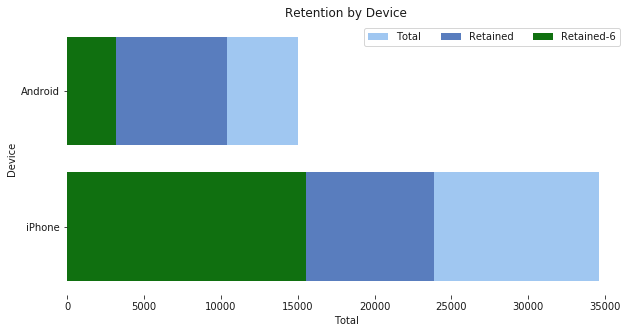

In [11]:
ultimate_phone = ultimate[['count', 'retained', 'retained_6', 'phone']].groupby('phone').sum().reset_index()

f, ax = plt.subplots(figsize=(10, 5))

sns.set_color_codes("pastel")
sns.barplot(x="count", y="phone", data=ultimate_phone,
            label="Total", color="b")

sns.set_color_codes("muted")
sns.barplot(x="retained", y="phone", data=ultimate_phone,
            label="Retained", color="b")

sns.set_color_codes("muted")
sns.barplot(x="retained_6", y="phone", data=ultimate_phone,
            label="Retained-6", color="green")

ax.legend(ncol=3, loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)
plt.ylabel('Device')
plt.xlabel('Total')
plt.title('Retention by Device')
plt.show()

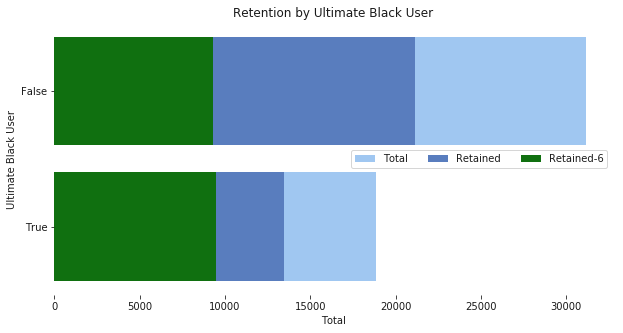

In [12]:
ultimate_black = ultimate[['count', 'retained', 'retained_6', 'ultimate_black_user']].groupby('ultimate_black_user').sum().reset_index()
ultimate_black['ultimate_black_user']  = ultimate_black['ultimate_black_user'].astype(str)
f, ax = plt.subplots(figsize=(10, 5))

sns.set_color_codes("pastel")
sns.barplot(x="count", y="ultimate_black_user", data=ultimate_black,
            label="Total", color="b")

sns.set_color_codes("muted")
sns.barplot(x="retained", y="ultimate_black_user", data=ultimate_black,
            label="Retained", color="b")

sns.set_color_codes("muted")
sns.barplot(x="retained_6", y="ultimate_black_user", data=ultimate_black,
            label="Retained-6", color="green")

ax.legend(ncol=3, loc="center right", frameon=True)
sns.despine(left=True, bottom=True)
plt.ylabel('Ultimate Black User')
plt.xlabel('Total')
plt.title('Retention by Ultimate Black User')
plt.show()

A few key insights: King's Landing customers are loyal, though initial adoption looks to be tough; the Android app is not nearly as popular as the iPhone app; ultimate black users have more loyalty than non-users.

## Predictive Model

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

In [14]:
# creating dummy variables

for elem in ultimate['city'].unique():
    ultimate[str(elem)] = ultimate['city'] == elem
    
for elem in ultimate['phone'].unique():
    ultimate[str(elem)] = ultimate['phone'] == elem

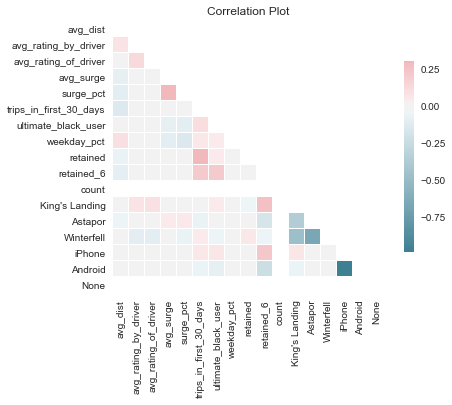

In [15]:
# feature correlations

corr1 = ultimate.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(style="white")
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})
plt.title('Correlation Plot')
plt.show()

In [16]:
X = ultimate[['avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'trips_in_first_30_days',
             'ultimate_black_user', 'weekday_pct', 'retained', "King's Landing", 'Winterfell', 'iPhone']]
Y = ultimate['retained_6']

I decided on a decision tree for its interpretability and feature importance identification. The logistic regression approach is nearly as accurate, but lacks easy interpretation like a decision tree does--if I'm gaining accuracy and interpretability, this model is the way to go.

Next, I'll splot my model in training and tests sets and do some cross-validation. Everything looks good.

In [17]:
d_tree = DecisionTreeClassifier(max_depth=3)
imp = Imputer(missing_values='NaN', strategy='median', axis=0)

steps = [('imputation', imp), ('clf', d_tree)]
pipeline = Pipeline(steps)

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.5, random_state=42)

for n in range(2,10):
    scores = cross_val_score(pipeline, X, Y, cv=n)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.74 (+/- 0.01)


In [18]:
model = pipeline.fit(xtrain, ytrain)
pred = model.predict(xtest)

score = metrics.accuracy_score(ytest, pred)
print(score)

0.74268


In [19]:
metrics.confusion_matrix(ytest, pred)

array([[13097,  2489],
       [ 3944,  5470]], dtype=int64)

In [20]:
features = pd.DataFrame(model.named_steps['clf'].feature_importances_).T
features.columns = list(X.columns.values)
print(features.T)

                               0
avg_rating_by_driver    0.616736
avg_rating_of_driver    0.000000
avg_surge               0.000000
surge_pct               0.000000
trips_in_first_30_days  0.000000
ultimate_black_user     0.022977
weekday_pct             0.000000
retained                0.000000
King's Landing          0.236468
Winterfell              0.000000
iPhone                  0.123818


Given the exploratory bar graphs from earlier, the positive effect of King's Landing, iPhones, and ultimate black users is not surprising. The average customer rating has a huge impact on customer loyalty, though the ratings are heavily skewed towards five stars. A small number of rides without incident  would fetch five stars, but frequent user are more likely to eventually clash with the drivers and thus get a lower rating.

The model is valid given the data set. Ideally, we could start out with every user interaction to get a count of rides outside of the arbitrary 30-day window. And instead of using that window to measure retention, we could consider a user retained if they have some level of activity (like one ride per month). After accumulating a few months of user data, we could then exclude everything within six months of the model run date so that no data inbetween that time is used for training.

As far as leveraging these insights, a good place to start is to further study King's Landing to see why their retention rat is so much higher. Initial adoption seems to be a bit tougher, but loyalty is promisingly high. If there was a way to increase driver presence or else promote adoption through incentives like free rides, that would go a long way. For the other cities, we should begin looking into factors that lead to lower retention rates despite a bigger presence.

Last, it seems that iPhone users have a higher retention rate, suggesting a lackluter Android app. Perhaps improvement on that platform will lead to better retention.